In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def plot_freq_bar(x, y, title, color='C0', scale='linear', figsize=(10, 5), rotation=True):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    plt.bar(x, y, color=color)
    if rotation:
        plt.setp(ax.get_xticklabels(), rotation=-45, horizontalalignment='left')
    plt.yscale(scale)
    plt.grid()

In [19]:
def scatter_freq(x, y, title, color='blue', scale='linear', figsize=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    plt.scatter(x, y, color=color)
    plt.yscale(scale)
    plt.grid()

In [24]:
def plot_pie(sizes, labels, title, floating_points=2):
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    ax1.pie(sizes, labels=labels, autopct=f'%1.{floating_points}f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title, pad=50)
    plt.show()

In [21]:
def get_timestamp(date_column):
    time_stamp = pd.to_datetime(date_column)
    df = pd.DataFrame()
    df['Year'] = time_stamp.apply(lambda time: time.year)
    df['Day'] = time_stamp.apply(lambda time: time.day)
    df['Month'] = time_stamp.apply(lambda time: time.month)
    df['Day of week'] = time_stamp.apply(lambda time: time.dayofweek)
    dmap = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri",5: "Sat", 6: "Sun"}
    df['Day of week'] = df['Day of week'].map(dmap)
    return df

In [6]:
dates = []
users = []
ratings = []
hotel_urls = []

In [7]:
reader = pd.read_json("F:\HotelRec.txt", lines=True, chunksize=2* 10**5)

In [8]:
def read_data(limit = 5 * 10**6):
    for idx, df_chunk in enumerate(reader):
        dates.extend(df_chunk['date'])
        users.extend(df_chunk['author'])
        ratings.extend(df_chunk['rating'])
        hotel_urls.extend(df_chunk['hotel_url'])
        print('*', end='')
        if idx * 2 * 10**5 > limit:
            break


In [ ]:
# readData(23 * 10**6)

In [2]:
# df = pd.DataFrame(zip(users, dates, ratings, hotel_urls), columns=['users', 'dates', 'ratings', 'hotel_url'])
dates_df = pd.read_csv("F:\HotelRecDates.csv")
users_df = pd.read_csv("F:\HotelRecSlice.csv")
hotels_df = pd.read_csv("F:\HotelRecUsers.csv")

In [5]:
df = pd.merge(users_df, dates_df)
df = pd.merge(df, hotels_df)

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,ratings,hotel_url,dates,users
0,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2019-01-01 00:00:00,violettaf340
1,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2016-01-01 00:00:00,Lagaiuzza
2,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2014-10-01 00:00:00,ashleyn763
3,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2014-08-01 00:00:00,DavideMauro
4,4,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2013-08-01 00:00:00,Alemma11


In [12]:
df = df.reindex(columns=['users', 'dates', 'ratings', 'hotel_url'])

In [13]:
df.to_csv('HotelRecSlice.csv')

In [45]:
df = pd.read_csv("F:\HotelRecSlice.csv")

In [51]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
timestamp_df = get_timestamp(df['dates'])

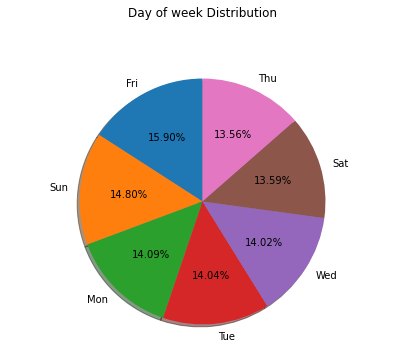

In [65]:
plot_pie(sizes=timestamp_df['Day of week'].value_counts(), 
         labels=timestamp_df['Day of week'].value_counts().index, title='Day of week Distribution')

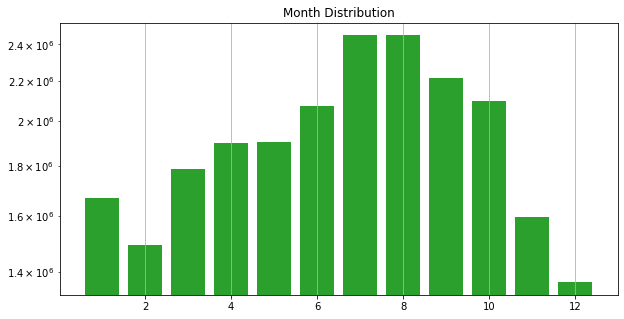

In [113]:
plot_freq_bar(timestamp_df['Month'].value_counts().index, timestamp_df['Month'].value_counts(), 
             'Month Distribution', scale='log', color='C2', rotation=False)

In [71]:
years = timestamp_df['Year'].unique()
years.sort()
years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [14]:
df['users'].describe()

count       22989118
unique      12452308
top       /undefined
freq          595157
Name: users, dtype: object

In [16]:
df['ratings'].describe()

count    2.300000e+07
mean     4.156585e+00
std      1.123922e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

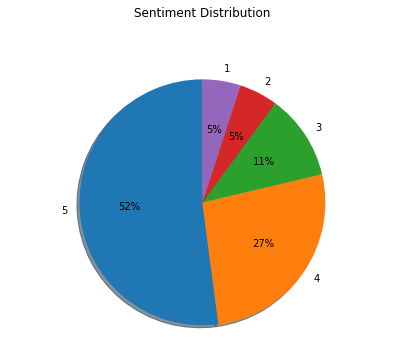

In [26]:
plot_pie(sizes=df['ratings'].value_counts(), labels=df['ratings'].value_counts().index, 
         title='Sentiment Distribution', floating_points=0)

In [52]:
users_reviews = df.groupby('users').count()

In [53]:
users_reviews.describe()

,dates,ratings,hotel_url
count,1.245231e+07,1.245231e+07,1.245231e+07
mean,1.846173e+00,1.846173e+00,1.846173e+00
std,1.686744e+02,1.686744e+02,1.686744e+02
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00
max,5.951570e+05,5.951570e+05,5.951570e+05


In [54]:
users_reviews[users_reviews['dates'] == users_reviews.max()['dates']]

,dates,ratings,hotel_url
users,,,
/undefined,595157,595157,595157


In [56]:
df.drop(df[df['users'] == '/undefined'].index, inplace=True)

In [57]:
users_reviews = df.groupby('users').count()

In [58]:
users_reviews = users_reviews['dates']

In [59]:
users_reviews.describe()

count    1.245231e+07
mean     1.798378e+00
std      2.397056e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.600000e+02
Name: dates, dtype: float64

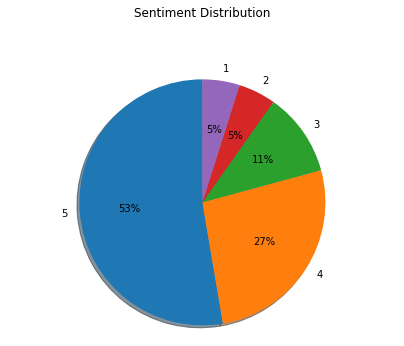

In [60]:
plot_pie(sizes=df['ratings'].value_counts(), labels=df['ratings'].value_counts().index, 
         title='Sentiment Distribution', floating_points=0)

In [61]:
hotels_reviews = df.groupby('hotel_url').count()['dates']

In [62]:
hotels_reviews.describe()

count    111093.000000
mean        201.676460
std         314.706276
min           1.000000
25%          62.000000
50%         138.000000
75%         250.000000
max       10191.000000
Name: dates, dtype: float64

In [ ]:
df = pd.read_csv('Hotels_features_dataset.csv')

In [ ]:
df.head()

In [9]:
from collections import Counter

most_common_counter = Counter(df['country'])

most_common = most_common_counter.most_common(20)

most_common_countries = [country for country, _ in most_common]
most_common_countries_counts = [count for _, count in most_common]

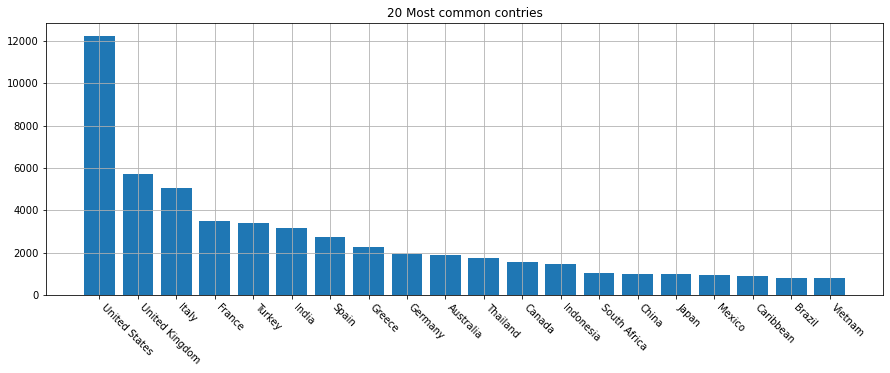

In [10]:
plot_freq_bar(most_common_countries, most_common_countries_counts, '20 Most common contries', figsize=(15, 5))

In [11]:
df['rating'].describe()

count    70107.000000
mean         4.072967
std          0.695431
min          0.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

In [33]:
features_df = df['amenities']
indices = [idx for idx, item in enumerate(features_df) if not isinstance(item, str)]
features_df.drop(indices, inplace=True)

In [40]:
features = set()
features_df.apply(lambda item: [features.add(x) for x in str(item).split(',')])
len(features)

479